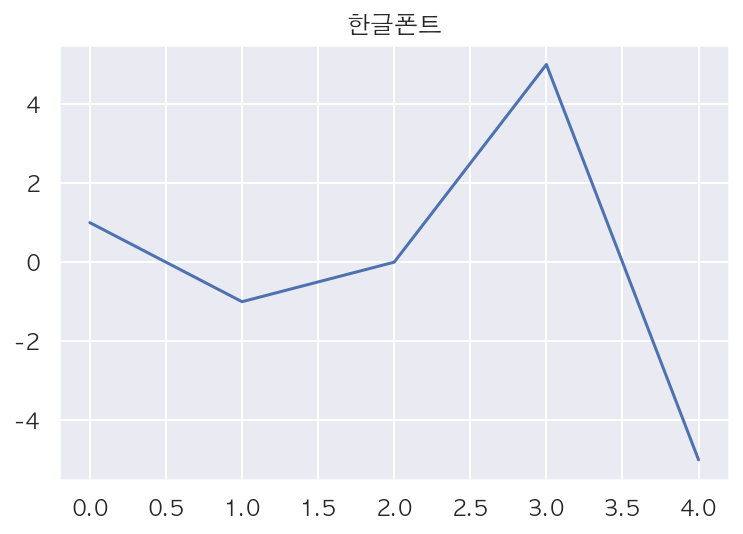

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

%matplotlib inline
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
pd.Series([1, -1, 0, 5, -5]).plot(title="한글폰트")

set_matplotlib_formats("retina")

In [2]:
df = pd.read_csv("data/park.csv", encoding="cp949")
df.shape

(18137, 20)

In [3]:
df.head(3)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
1,26440-00002,압곡공원,근린공원,NaN,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,4,NaN,NaN,NaN,"배드민턴장, 족구장, 파고라4, 안내판, 볼라드7, 데크435.11㎡, 데크계단19...",2008-02-28,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
2,26440-00003,서연정공원,소공원,NaN,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,7,NaN,NaN,NaN,"앉음벽13.57m, 트렐리스3, 안내판2, 플랜트2, 파고라, 평의자4",2013-01-23,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN


In [4]:
import pandas_profiling

pandas_profiling.__version__

'2.9.0'

In [5]:
from pandas_profiling import ProfileReport

%time profile = ProfileReport(df, title="도시공원 표준 데이터")
profile.to_file(output_file="data/park-profile.html")

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s, Describe variable:공원구분]CPU times: user 34.3 ms, sys: 1.93 ms, total: 36.2 ms
Wall time: 47.4 ms
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 81.13it/s]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          18137 non-null  object 
 1   공원명           18137 non-null  object 
 2   공원구분          18137 non-null  object 
 3   소재지도로명주소      8039 non-null   object 
 4   소재지지번주소       17158 non-null  object 
 5   위도            18137 non-null  float64
 6   경도            18137 non-null  float64
 7   공원면적          18137 non-null  float64
 8   공원보유시설(운동시설)  4845 non-null   object 
 9   공원보유시설(유희시설)  6964 non-null   object 
 10  공원보유시설(편익시설)  5084 non-null   object 
 11  공원보유시설(교양시설)  1160 non-null   object 
 12  공원보유시설(기타시설)  3116 non-null   object 
 13  지정고시일         15225 non-null  object 
 14  관리기관명         17383 non-null  object 
 15  전화번호          16957 non-null  object 
 16  데이터기준일자       18137 non-null  object 
 17  제공기관코드        18137 non-null  object 
 18  제공기관명         18137 non-nu

In [7]:
round(df.isnull().mean() * 100, 2)

관리번호              0.00
공원명               0.00
공원구분              0.00
소재지도로명주소         55.68
소재지지번주소           5.40
위도                0.00
경도                0.00
공원면적              0.00
공원보유시설(운동시설)     73.29
공원보유시설(유희시설)     61.60
공원보유시설(편익시설)     71.97
공원보유시설(교양시설)     93.60
공원보유시설(기타시설)     82.82
지정고시일            16.06
관리기관명             4.16
전화번호              6.51
데이터기준일자           0.00
제공기관코드            0.00
제공기관명             0.00
Unnamed: 19     100.00
dtype: float64

In [8]:
df = df.drop(["Unnamed: 19"], axis=1)

In [9]:
df['소재지도로명주소'] = df['소재지도로명주소'].fillna(df['소재지지번주소'])
df['소재지도로명주소'].isnull().sum()

0

In [10]:
df[df['소재지도로명주소'].isnull() & df['소재지지번주소'].isnull()].shape

(0, 19)

In [11]:
df["시도"] = df["소재지도로명주소"].str.split(expand=True)[0]
df["구군"] = df["소재지도로명주소"].str.split(expand=True)[1]
df[["소재지도로명주소", "시도", "구군"]].head(3)

,소재지도로명주소,시도,구군
0,부산광역시 강서구 구랑동 1199-7,부산광역시,강서구
1,부산광역시 강서구 구랑동 1219,부산광역시,강서구
2,부산광역시 강서구 대저1동 1330-7,부산광역시,강서구


In [12]:
df["시도"].value_counts()

경기도        3318
전라남도       1882
경상남도       1825
서울특별시      1745
충청남도       1723
전라북도       1137
경상북도        917
충청북도        899
울산광역시       887
인천광역시       675
부산광역시       653
강원도         647
대구광역시       586
대전광역시       497
광주광역시       429
제주특별자치도     246
세종특별자치시      70
강원            1
Name: 시도, dtype: int64

In [13]:
df["시도"] = df["시도"].replace("강원", "강원도")
df["시도"].value_counts()

경기도        3318
전라남도       1882
경상남도       1825
서울특별시      1745
충청남도       1723
전라북도       1137
경상북도        917
충청북도        899
울산광역시       887
인천광역시       675
부산광역시       653
강원도         648
대구광역시       586
대전광역시       497
광주광역시       429
제주특별자치도     246
세종특별자치시      70
Name: 시도, dtype: int64

<AxesSubplot:xlabel='경도', ylabel='위도'>

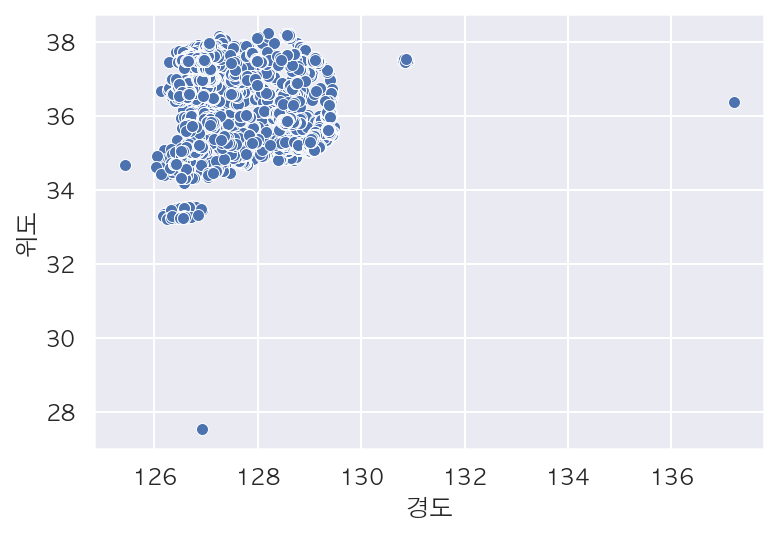

In [14]:
sns.scatterplot(data=df, x="경도", y="위도")

<AxesSubplot:xlabel='경도', ylabel='위도'>

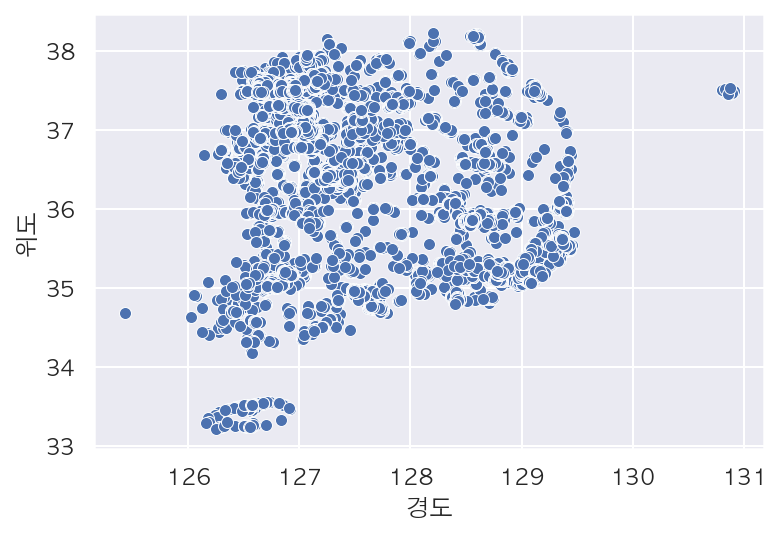

In [15]:
df_park = df[(df["경도"] < 132) & (df["위도"] > 32)].copy()
sns.scatterplot(data=df_park, x="경도", y="위도")

In [16]:
df["지정고시일"].head()

0    2011-09-02
1    2008-02-28
2    2013-01-23
3    1998-07-25
4    1995-04-07
Name: 지정고시일, dtype: object

In [17]:
df["지정고시일"] = pd.to_datetime(df["지정고시일"])
df["지정고시일"].head(1)

0   2011-09-02
Name: 지정고시일, dtype: datetime64[ns]

In [18]:
df["고시연도"] = df["지정고시일"].dt.year
df["고시월"] = df["지정고시일"].dt.month

df[["지정고시일", "고시연도", "고시월"]].head()

,지정고시일,고시연도,고시월
0,2011-09-02,2011.0,9.0
1,2008-02-28,2008.0,2.0
2,2013-01-23,2013.0,1.0
3,1998-07-25,1998.0,7.0
4,1995-04-07,1995.0,4.0


<AxesSubplot:xlabel='고시연도', ylabel='Density'>

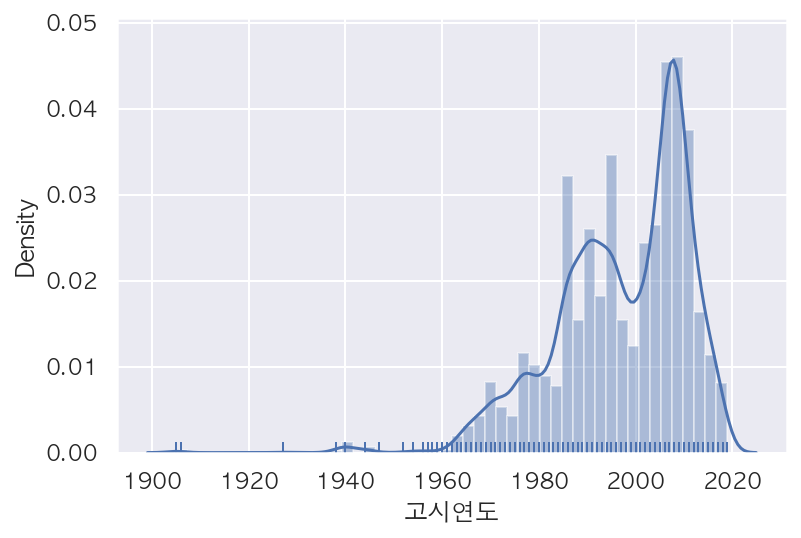

In [19]:
sns.distplot(df.loc[df["고시연도"].notnull(), "고시연도"], rug=True)

In [20]:
year_month = pd.pivot_table(df, index="고시연도", columns="고시월", 
               values="공원명", aggfunc="count")
year_month = year_month[(year_month.index > 2000) & (year_month.index < 2019)]
year_month.astype(int).style.background_gradient()

고시월,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
고시연도,,,,,,,,,,,,
2001.0,48,12,7,42,21,16,6,16,30,36,37,40
2002.0,38,19,18,10,18,14,49,17,7,7,59,55
2003.0,21,13,17,19,10,23,4,8,7,18,48,38
2004.0,48,18,16,18,13,24,7,48,10,24,59,135
2005.0,55,32,18,23,43,33,16,62,18,34,60,105
2006.0,84,34,69,31,54,32,18,33,24,36,119,120
2007.0,69,12,9,42,16,46,62,66,84,164,245,106
2008.0,163,45,77,42,30,102,15,61,32,20,24,126
2009.0,59,31,162,135,57,60,36,23,96,27,73,100


In [21]:
import re
pd.options.display.max_columns = 100
df.head(1)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군,고시연도,고시월
0,26440-00001,구랑공원,문화공원,부산광역시 강서구 구랑동 1199-7,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,부산광역시,강서구,2011.0,9.0


In [22]:
gym = df["공원보유시설(운동시설)"].unique().tolist()
gym = str(gym)
gym[:1000]

"['4', '7', nan, '8', '5', '6', '3', '10', '14', '9', '30', '2', '13', '12', '40', '17', '-', '농구장', '궁도장', '풋살구장', '풋살구장, 농구장, 인라인스케이트장', '축구장', '족구장', '게이트볼장', '운동기구14개, 농구장2개소, 족구장1개소', '운동기구6개, 족구장1개소', '운동기구10개', '운동기구4개', '운동기구7개', '에어로빅장, 농구장', '테니스장, 씨름장, 농구장', '바디싣업1,스트레칭롤러1,전신돌리기1,허리안마기1,허리비틀기1', 'TM스탭사이클1,TM체어웨이트1,TM트윈바디싣업1,TM트윈트위스트1,TM크로스컨트리1,TM풀웨이트1', '철봉1', '하늘걷기1,마라톤운동1,허리돌리기1,3단철봉,윗몸일으키기1', '철봉1,팔굽혀펴기1,몸통돌리기1,허리좌우로흔들기1', '스트레칭롤러1,풀웨이트1,바웨이트1', '하늘걷기1,온몸허리돌리기1,스트레칭기1,거꾸로매달리기1', '하늘걷기1,온몸허리돌리기1,등허리지압기1,철봉3', '스탭싸이클1,풀웨이트1,트리플트위스트2,트윈바디싣업1,크로스컨트리1,스트레칭롤러1,트윈워밍암1', '하늘걷기2,스탭싸이클1,체어폴1,철봉1,트리플트위스트2,트윈바디싣업1', '윗몸일으키기1,온몸허리돌리기1,팔굽혀펴기1,다리뻗치기1,온몸허리돌리기1,거꾸로매달리기1', '하늘걷기1,온몸허리돌리기1,옆파도타기1', '크로스워킹+스카이워킹1,파워프레스+풀웨이트1,싸이클론+트위스트1,스탠드업+마사지롤1,사이드스윙+터닝암1,푸시웨이트+레그프레스1', '평행봉1', '트윈바디싣업1,트윈트위스트1,스탭싸이클1,크로스컨트리1,체어풀1', '크로스컨트리1,자전거팔뻗기2,등안마기1,트윈워밍암1,체어웨이트1,오버턴스트레칭1', '크로스컨트리1,롤링웨이스트1,레그프레스1,트윈트위스트1,체어웨이트1', '족구장1,역기1', '등지압기1,마라톤운동+공중걷기운동1,허리돌리기+온몸돌리기1, 온몸역기올리기+온몸근육풀기1', '트리플트위스트1,트윈바디싣업1,크로스컨

In [23]:
gym = gym.replace("+", ",").replace("'", ",").replace(" ", ",").replace("/", ",")
gym[:1000]

'[,4,,,,7,,,nan,,,8,,,,5,,,,6,,,,3,,,,10,,,,14,,,,9,,,,30,,,,2,,,,13,,,,12,,,,40,,,,17,,,,-,,,,농구장,,,,궁도장,,,,풋살구장,,,,풋살구장,,농구장,,인라인스케이트장,,,,축구장,,,,족구장,,,,게이트볼장,,,,운동기구14개,,농구장2개소,,족구장1개소,,,,운동기구6개,,족구장1개소,,,,운동기구10개,,,,운동기구4개,,,,운동기구7개,,,,에어로빅장,,농구장,,,,테니스장,,씨름장,,농구장,,,,바디싣업1,스트레칭롤러1,전신돌리기1,허리안마기1,허리비틀기1,,,,TM스탭사이클1,TM체어웨이트1,TM트윈바디싣업1,TM트윈트위스트1,TM크로스컨트리1,TM풀웨이트1,,,,철봉1,,,,하늘걷기1,마라톤운동1,허리돌리기1,3단철봉,윗몸일으키기1,,,,철봉1,팔굽혀펴기1,몸통돌리기1,허리좌우로흔들기1,,,,스트레칭롤러1,풀웨이트1,바웨이트1,,,,하늘걷기1,온몸허리돌리기1,스트레칭기1,거꾸로매달리기1,,,,하늘걷기1,온몸허리돌리기1,등허리지압기1,철봉3,,,,스탭싸이클1,풀웨이트1,트리플트위스트2,트윈바디싣업1,크로스컨트리1,스트레칭롤러1,트윈워밍암1,,,,하늘걷기2,스탭싸이클1,체어폴1,철봉1,트리플트위스트2,트윈바디싣업1,,,,윗몸일으키기1,온몸허리돌리기1,팔굽혀펴기1,다리뻗치기1,온몸허리돌리기1,거꾸로매달리기1,,,,하늘걷기1,온몸허리돌리기1,옆파도타기1,,,,크로스워킹,스카이워킹1,파워프레스,풀웨이트1,싸이클론,트위스트1,스탠드업,마사지롤1,사이드스윙,터닝암1,푸시웨이트,레그프레스1,,,,평행봉1,,,,트윈바디싣업1,트윈트위스트1,스탭싸이클1,크로스컨트리1,체어풀1,,,,크로스컨트리1,자전거팔뻗기2,등안마기1,트윈워밍암1,체어웨이트1,오버턴스트레칭1,,,,크로스컨트리1,롤링웨이스트1,레그프레스1,트윈트위스트1,체어웨이트1,,,,족구장1,역기1,,,,등지압기1,마라톤운동,공중걷기운동1,허리돌리기,온몸돌리기1,,온몸역기올리기,온몸근육풀기1,,,,트리플트위스트1,트윈바디싣업1,크로스컨

In [24]:
gym = re.sub("[\[\d\-nan\.\]]", "", gym)
gym = re.sub(",{2,}", ",", gym)
gym[:1000]

',농구장,궁도장,풋살구장,풋살구장,농구장,인라인스케이트장,축구장,족구장,게이트볼장,운동기구개,농구장개소,족구장개소,운동기구개,족구장개소,운동기구개,운동기구개,운동기구개,에어로빅장,농구장,테니스장,씨름장,농구장,바디싣업,스트레칭롤러,전신돌리기,허리안마기,허리비틀기,TM스탭사이클,TM체어웨이트,TM트윈바디싣업,TM트윈트위스트,TM크로스컨트리,TM풀웨이트,철봉,하늘걷기,마라톤운동,허리돌리기,단철봉,윗몸일으키기,철봉,팔굽혀펴기,몸통돌리기,허리좌우로흔들기,스트레칭롤러,풀웨이트,바웨이트,하늘걷기,온몸허리돌리기,스트레칭기,거꾸로매달리기,하늘걷기,온몸허리돌리기,등허리지압기,철봉,스탭싸이클,풀웨이트,트리플트위스트,트윈바디싣업,크로스컨트리,스트레칭롤러,트윈워밍암,하늘걷기,스탭싸이클,체어폴,철봉,트리플트위스트,트윈바디싣업,윗몸일으키기,온몸허리돌리기,팔굽혀펴기,다리뻗치기,온몸허리돌리기,거꾸로매달리기,하늘걷기,온몸허리돌리기,옆파도타기,크로스워킹,스카이워킹,파워프레스,풀웨이트,싸이클론,트위스트,스탠드업,마사지롤,사이드스윙,터닝암,푸시웨이트,레그프레스,평행봉,트윈바디싣업,트윈트위스트,스탭싸이클,크로스컨트리,체어풀,크로스컨트리,자전거팔뻗기,등안마기,트윈워밍암,체어웨이트,오버턴스트레칭,크로스컨트리,롤링웨이스트,레그프레스,트윈트위스트,체어웨이트,족구장,역기,등지압기,마라톤운동,공중걷기운동,허리돌리기,온몸돌리기,온몸역기올리기,온몸근육풀기,트리플트위스트,트윈바디싣업,크로스컨트리,체어웨이트,롤링웨이스트,레그프레스,오버턴스트레칭,윗몸일으키기,트리플트위스트,평행봉,크로스컨트리,레그프레스,체어웨이트,롤링웨이스트,트윈바디싣업,레그스트레칭,크로스컨트리,어깨근육풀기,체어웨이트,트윈바디싣업(구형),트리플트위스트(구형),게이트볼장,운동시설,축구장,족구장,족구장,운동기구,운동기구,축구장,배드민턴장,농구장,배드민턴장,족구장,농구대,배드민턴장,배드민턴장,농구대,농구장,개소,배드민턴장,게이트볼장,개소,체력단련시설,개소,기,등,배드민턴장,개소,체력단련시설,개소,개,배드민턴장,개소,농구장,개소,체력단련시설,개소,개,다목

In [25]:
gym_count = pd.Series(gym.split(",")).value_counts()
gym_count.head()

배드민턴장     221
농구장       216
운동기구      185
게이트볼장     156
체력단련시설    148
dtype: int64

<AxesSubplot:>

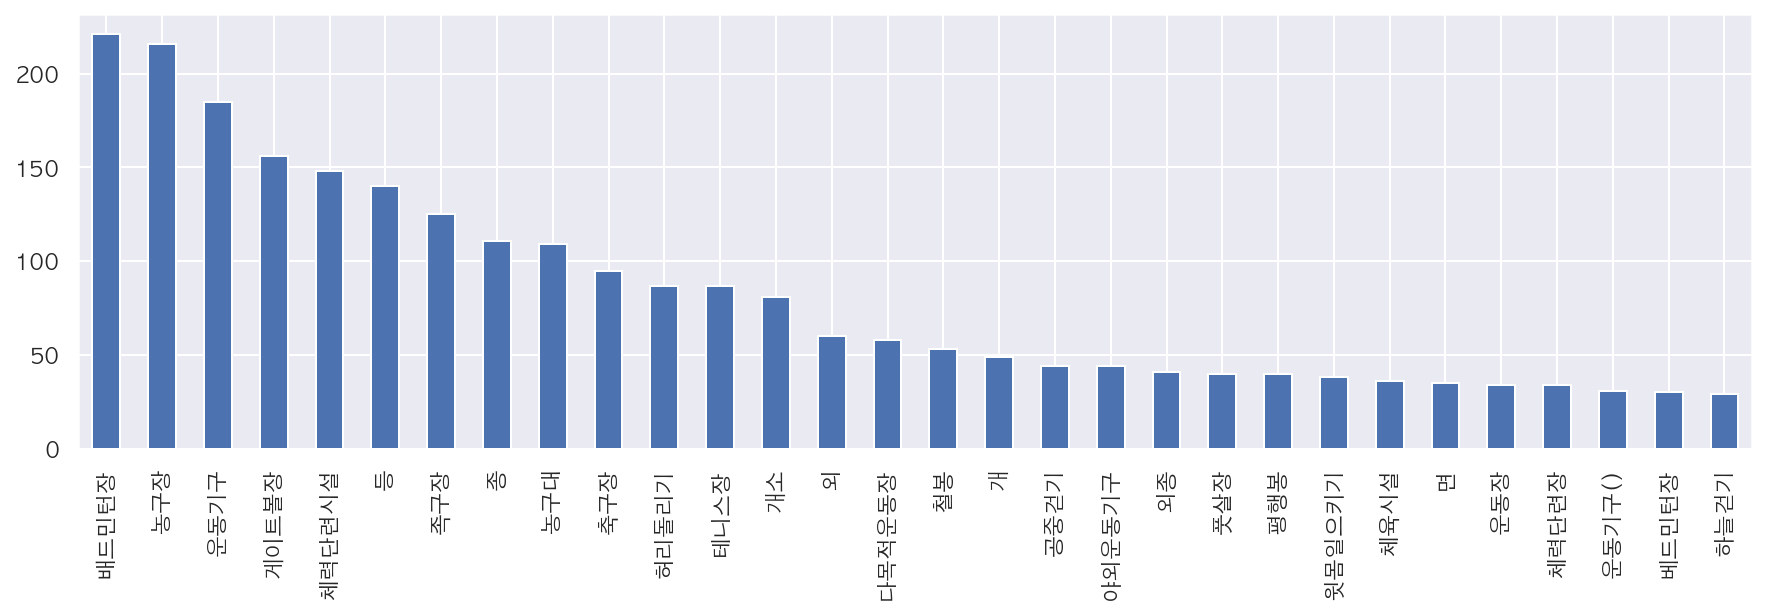

In [26]:
gym_count.head(30).plot.bar(figsize=(15, 4))

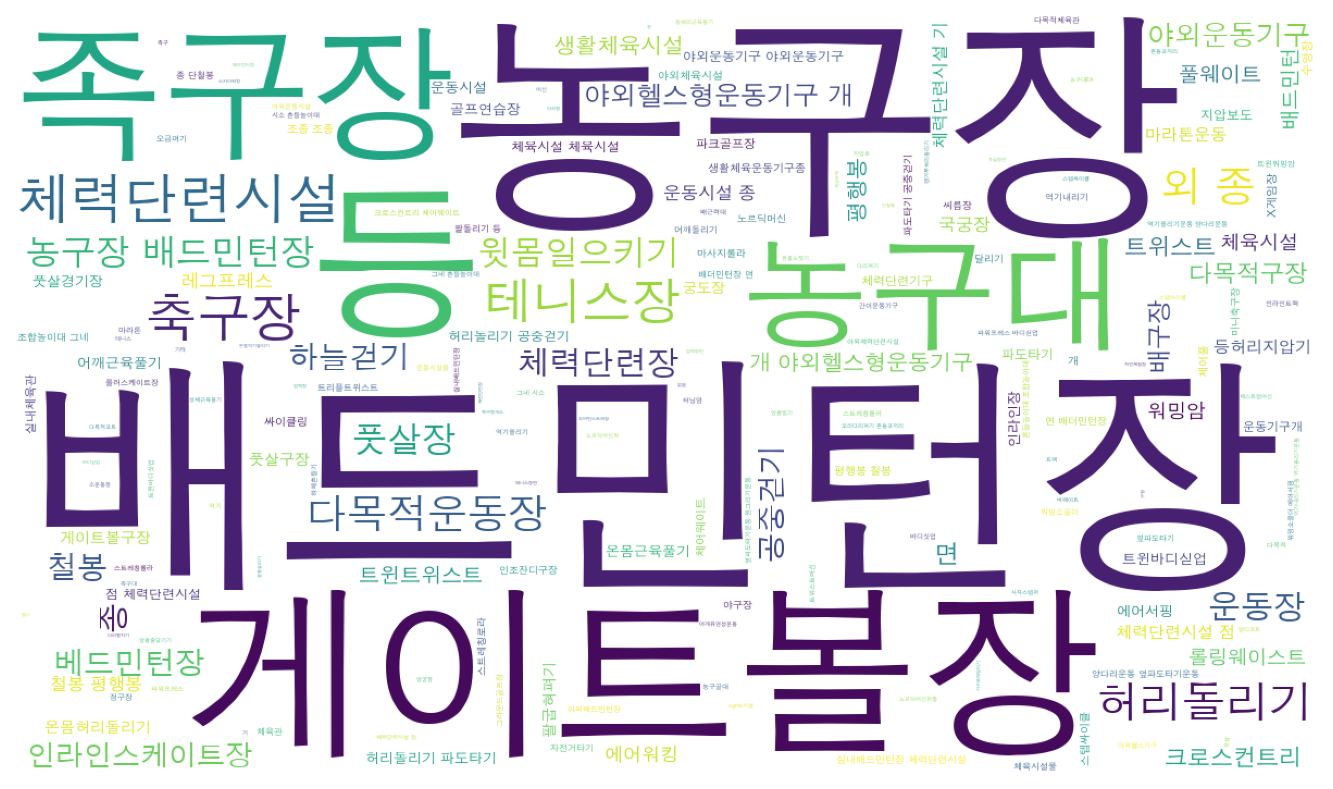

In [27]:
from wordcloud import WordCloud

def wordcloud(data, width=1200, height=500):
    word_draw = WordCloud(
        font_path=r"/Library/Fonts/AppleGothic.ttf",
        width=width, height=height,
        stopwords=["운동기구", "개소", "외종"], 
        background_color="white",
        random_state=42
    )
    word_draw.generate(data)

    plt.figure(figsize=(15, 7))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show()
    
wordcloud(gym, width=1200, height=700)

In [28]:
def get_string(text):
    if pd.isna(text):
        return text
    
    text = re.sub("[\d\.'\-(nan)\[\]\/]", "", text)
    text = re.sub(" ", "", text)
    text = re.sub(",{2,}", ",", text)
    return text

df["편익시설"] = df["공원보유시설(편익시설)"].map(get_string)
df["편익시설"].head()

0    화장실
1    NaN
2    NaN
3    NaN
4    NaN
Name: 편익시설, dtype: object

In [29]:
df["편익시설"].value_counts()

화장실                                                                                                                         1086
                                                                                                                             213
벤치                                                                                                                           193
정자,벤치                                                                                                                        165
주차장,화장실                                                                                                                      141
                                                                                                                            ... 
주차장,화장실,멀티비전                                                                                                                   1
놀이터이용안내판,종합안내판,등의자,파고라                                                                           

In [30]:
fac = ",".join(df.loc[df["편익시설"].notnull(), "편익시설"])
fac = get_string(fac)
fac[:100]

'화장실,화장실,화장실,주차장,관리사무소,화장실,화장실,화장실,주차장,화장실,주차장,화장실,주차장,문화회관,화장실,화장실,화장실,음수전,음수전,주차장,주차장,화장실,화장실,주차장,화'

In [31]:
fac = str(df["편익시설"].tolist())
fac = get_string(fac)
fac[:100]

'화장실,화장실,화장실,주차장,관리사무소,화장실,화장실,화장실,주차장,화장실,주차장,화장실,주차장,문화회관,화장실,화장실,화장실,음수전,음수전,주차장,주차장,화장실,화장실,주차장,화'

In [32]:
fac_count = pd.Series(fac.split(",")).value_counts()
fac_count.head()

화장실    1921
파고라     817
벤치      650
정자      535
주차장     502
dtype: int64

In [33]:
facilities = ["화장실", "주차장", "음수대", "파고라", "정자", 
              "벤치", "의자", "놀이터", "축구장", "야영장", "CCTV"]

df_fac = df[df["공원보유시설(편익시설)"].notnull()]

In [34]:
for f in facilities:
    df[f] = df_fac["공원보유시설(편익시설)"].str.contains(f)
df[facilities].sum()

화장실     2208.0
주차장      611.0
음수대      493.0
파고라     1032.0
정자       648.0
벤치       850.0
의자       949.0
놀이터       21.0
축구장        6.0
야영장        3.0
CCTV       6.0
dtype: float64

In [35]:
phone = "+82-10-1234-5678"

def mask_phone_number(phone):
    
    if pd.isnull(phone):
        return phone
    
    num = phone.split("-")
    num_len = len(num) // 2
    
    num[num_len] = re.sub("\w", "*", num[num_len])
    num[-1] = re.sub("(\d{2})(\d{2})", r"**\2", num[-1])
    
    return "-".join(num)

mask_phone_number(phone)

'+82-10-****-**78'

In [36]:
df["전화번호(전처리)"] = df["전화번호"].map(mask_phone_number)
df[["공원명", "전화번호", "전화번호(전처리)"]].sample(10)

,공원명,전화번호,전화번호(전처리)
15232,복지불공원,052-209-3744,052-***-**44
18092,소공원2호,041-630-1268,041-***-**68
9674,선유산업단지4호 어린이공원,031-940-5382,031-***-**82
8046,체육공원1,055-548-4501,055-***-**01
11632,신대부적4공원,053-810-5213,053-***-**13
17500,중앙공원,063-580-4644,063-***-**44
17964,36호어린이공원,031-860-2416,031-***-**16
5831,송산공원,043-835-4532,043-***-**32
17081,한마음공원,NaN,NaN
7777,자은3지구공원,055-548-4501,055-***-**01


In [37]:
manage_category = pd.crosstab(index=df["관리기관명"], columns=df["공원구분"])
manage_category[manage_category["체육공원"] > 5].style.background_gradient()

공원구분,근린공원,기타,도시농업공원,묘지공원,문화공원,소공원,수변공원,어린이공원,역사공원,체육공원
관리기관명,,,,,,,,,,
경기도 김포시 체육과,0,0,0,0,0,0,0,0,0,7
경기도 남양주시청,33,0,0,2,5,25,4,68,4,6
경기도 시흥시청,37,0,1,0,7,6,3,72,0,6
경상남도 창원시청,224,0,0,8,8,100,0,816,0,20
대전광역시 대덕구청,11,1,0,0,3,8,0,50,1,6
성남시 공원과,50,0,0,1,0,0,0,0,2,6
전라남도 장성군청,14,0,0,0,4,118,2,10,2,6


In [38]:
city_count = df["시도"].value_counts().to_frame()
city_mean = df["시도"].value_counts(normalize=True).to_frame()
city_count.head()

,시도
경기도,3318
전라남도,1882
경상남도,1825
서울특별시,1745
충청남도,1723


In [39]:
city = city_count.merge(city_mean, left_index=True, right_index=True)
city.columns = ["합계", "비율"]
city.style.background_gradient()


,합계,비율
경기도,3318,0.182941
전라남도,1882,0.103766
경상남도,1825,0.100623
서울특별시,1745,0.096212
충청남도,1723,0.094999
전라북도,1137,0.062690
경상북도,917,0.050560
충청북도,899,0.049567
울산광역시,887,0.048906
인천광역시,675,0.037217


<AxesSubplot:xlabel='경도', ylabel='위도'>

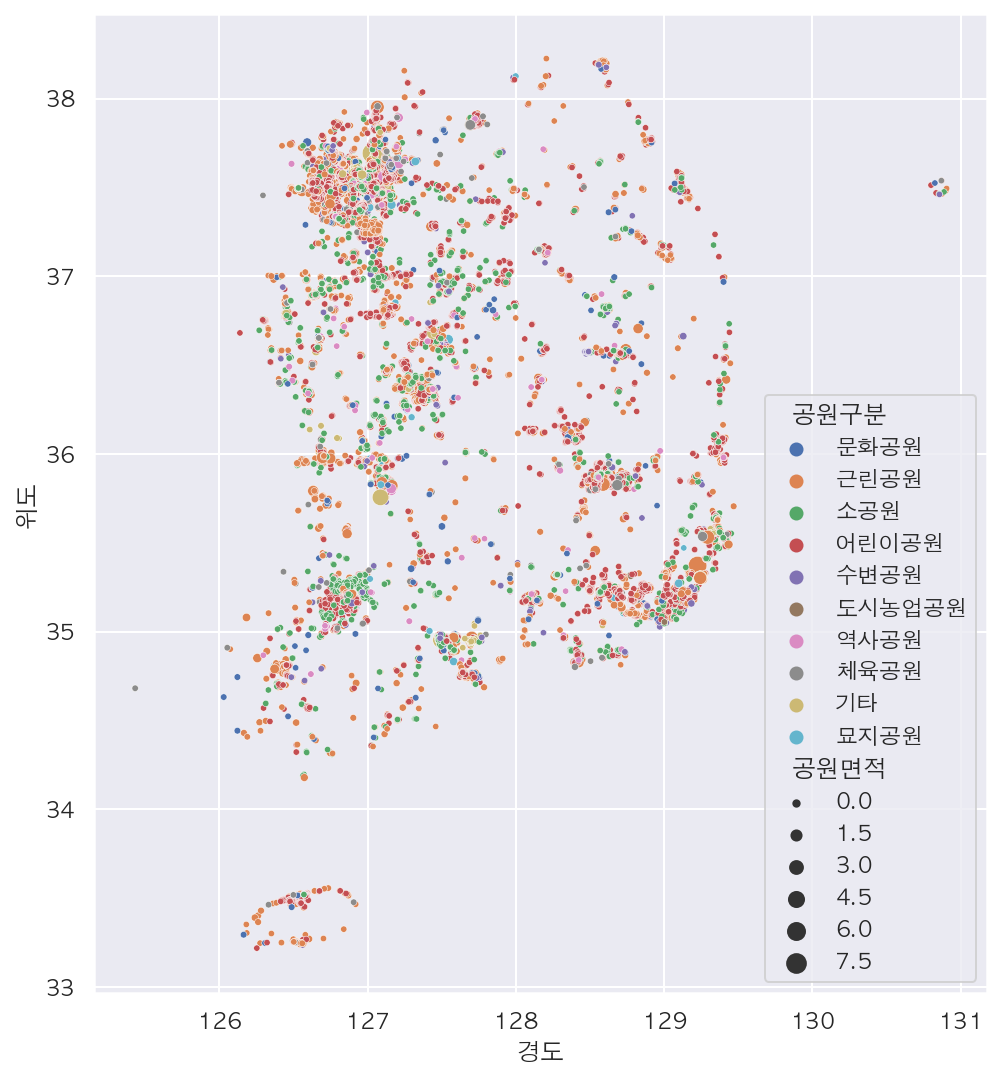

In [40]:
plt.figure(figsize=(8, 9))
sns.scatterplot(data=df_park, x="경도", y="위도", 
                hue="공원구분", size="공원면적", sizes=(10, 100))

<AxesSubplot:xlabel='count', ylabel='시도'>

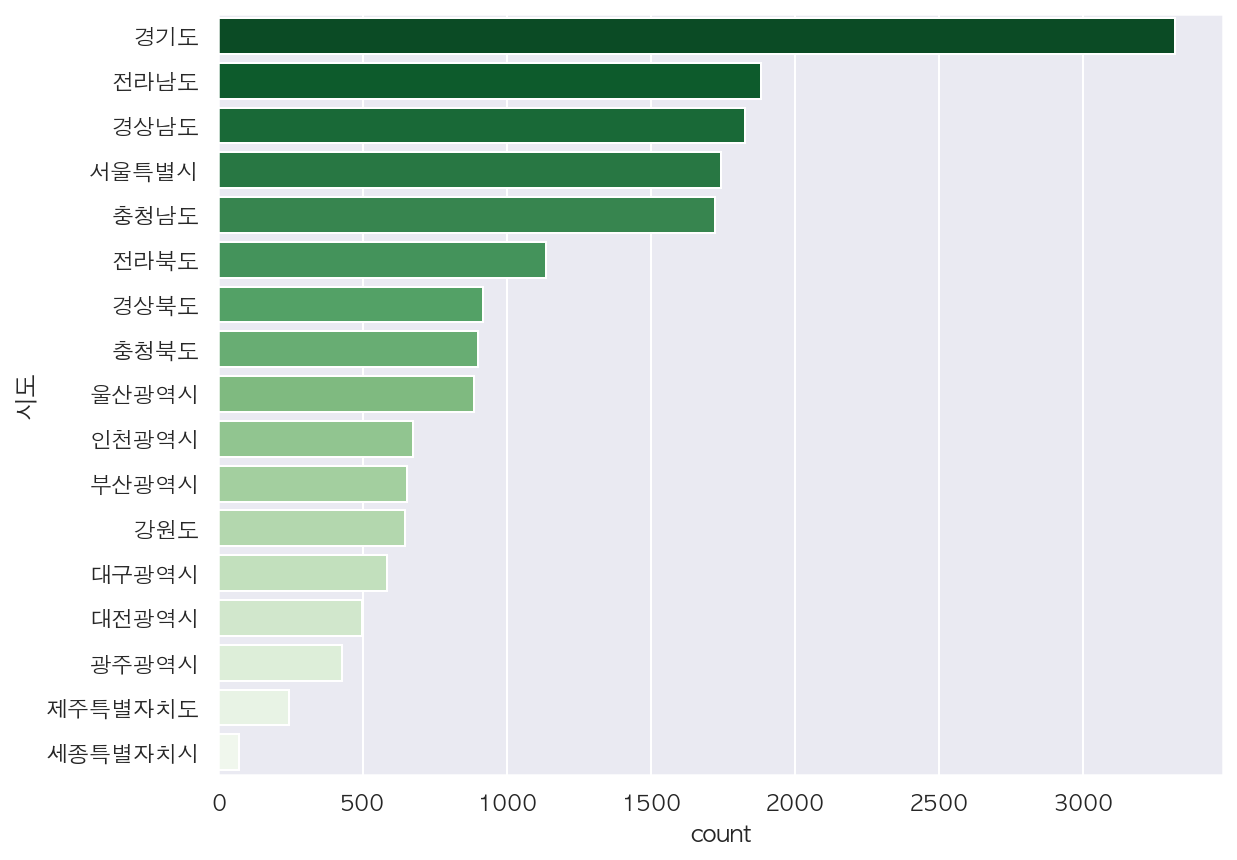

In [41]:
plt.figure(figsize=(9, 7))
sns.countplot(data=df, y="시도", order=city_count.index, palette="Greens_r")

In [42]:
park_size = pd.pivot_table(df, index="시도", values="공원면적", 
               aggfunc=["count", "mean", "median"])
park_size.style.background_gradient()

,count,mean,median
,공원면적,공원면적,공원면적
시도,,,
강원도,648,29539.004630,1886.500000
경기도,3318,27628.744093,2527.900000
경상남도,1825,51390.226795,2163.000000
경상북도,917,29771.096947,2146.000000
광주광역시,429,20571.033333,2192.000000
대구광역시,586,28622.956143,2044.150000
대전광역시,497,36507.091952,2069.100000
부산광역시,653,54162.930521,2158.000000
